In [2]:
# !pip install graphviz      #트리 시각화 설치

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

import mglearn

In [2]:
cancer = load_breast_cancer()
X, y = cancer['data'], cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y ,random_state=42)

In [3]:
#tree가 작업 할때 어떤 속성을 먼저 할지 고정하지 않으면 계속 수치가 바뀐다. knn은 이웃개수설정으로 수치 조절. tree는 단계조정으로 수치 조절
dtc = DecisionTreeClassifier(random_state=0)   
dtc.fit(X_train, y_train)
dtc.score(X_train, y_train), dtc.score(X_test, y_test)

(1.0, 0.9370629370629371)

In [4]:
dtc = DecisionTreeClassifier(max_depth=4 , random_state=0)   
dtc.fit(X_train, y_train)
dtc.score(X_train, y_train), dtc.score(X_test, y_test)

(0.9882629107981221, 0.951048951048951)

In [5]:
dtc = DecisionTreeClassifier(min_samples_leaf=3 , random_state=0)   
dtc.fit(X_train, y_train)
dtc.score(X_train, y_train), dtc.score(X_test, y_test)

(0.9788732394366197, 0.9370629370629371)

In [6]:
dtc = DecisionTreeClassifier(max_leaf_nodes=8 , random_state=0)   
dtc.fit(X_train, y_train)
dtc.score(X_train, y_train), dtc.score(X_test, y_test)

(0.9835680751173709, 0.951048951048951)

In [7]:
dtc = DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=0)       
#default가 gini로 잡혀 있음. 지니계수(gini) : 경제학에서 불평등지수를 나타낼 때 사용하는 것, 
# 지니와 엔트로피 큰차이가 없음.일반적으로는 지니가 속도가 더 빠릅니다. 
# 지니는 일반적으로 한쪽 가지로 고립시키는 경향이 있음
# 엔트로피는 조금 더 균형 잡힌 트리를 만듭니다. 등의 제약을 걸 수 있는 옵션들이 있다
dtc.fit(X_train, y_train)
dtc.score(X_train, y_train), dtc.score(X_test, y_test)

(0.9859154929577465, 0.958041958041958)

In [8]:
export_graphviz(dtc, out_file='cancer-tree.dot', class_names=['악성','양성'],
                feature_names=cancer['feature_names'], filled = True)

In [9]:
X_train.shape

(426, 30)

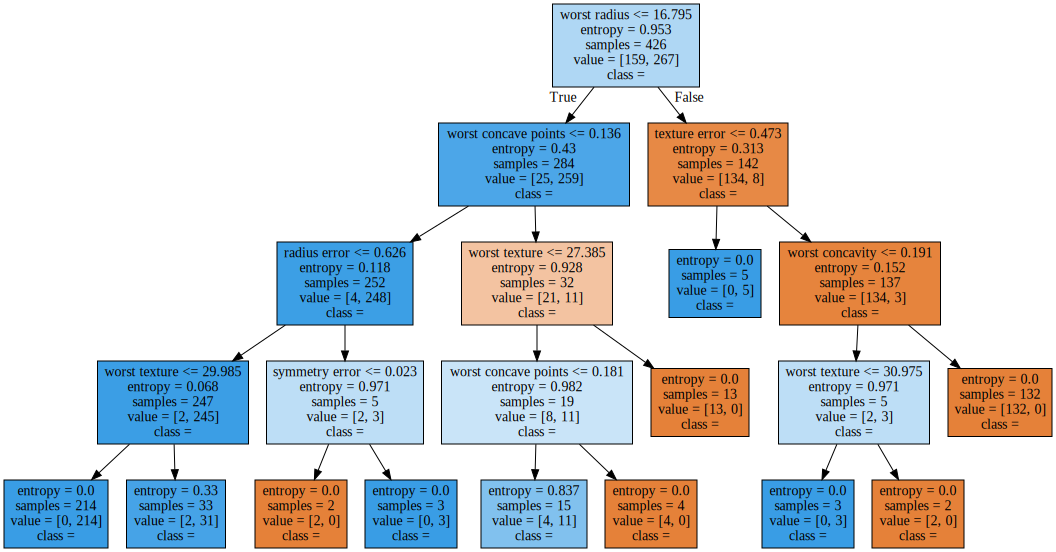

In [10]:
import graphviz

with open('cancer-tree.dot', encoding='utf-8') as f:
    tree_graph= graphviz.Source(f.read())
    display(tree_graph)

In [11]:
# 트리 형성에 미친 속성의 영향 정도
print(dtc.feature_importances_.sum())
dtc.feature_importances_

0.9999999999999998


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02093242, 0.06165377, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01268893, 0.        ,
       0.62610311, 0.05695529, 0.        , 0.        , 0.        ,
       0.        , 0.0417274 , 0.17993908, 0.        , 0.        ])

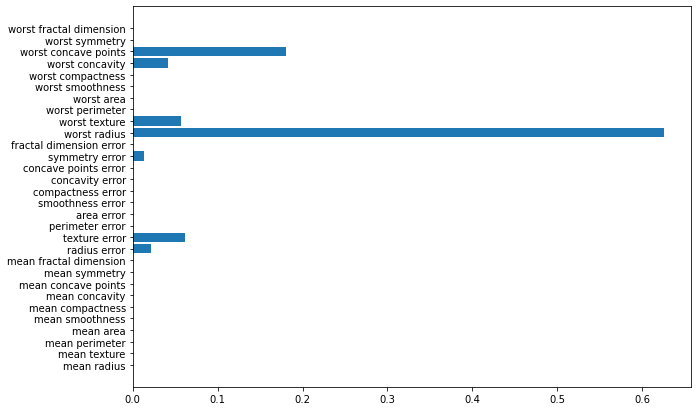

In [12]:
plt.figure(figsize=(10,7))
plt.barh(range(X.shape[1]), dtc.feature_importances_)   # range(X.shape[1]): 열 범위
plt.yticks(range(X.shape[1]), cancer['feature_names'])   # y축 이름 붙이는 것
plt.show()

In [21]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor

boston = load_boston()
X, y = boston['data'], boston['target']
X_train, X_test,y_train,y_test = train_test_split(X, y, random_state=42)

dtr = DecisionTreeRegressor(max_depth=8 ,random_state=0)
dtr.fit(X_train, y_train)
print(dtr.score(X_train,y_train), dtr.score(X_test, y_test))
print(dtr.predict(X_test[:3]), y_test[:3])

0.9758475867215165 0.8490540360979767
[22.19591837 32.53333333 15.2       ] [23.6 32.4 13.6]


In [24]:
ram_prices = pd.read_csv('data-files/ram_price.csv')
ram_prices = ram_prices[['date','price']]
ram_prices.head(3) 

,date,price
0,1957.0,411041792.0
1,1959.0,67947725.0
2,1960.0,5242880.0


In [27]:
from sklearn.linear_model import LinearRegression
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용합니다
X_train = data_train.date[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행합니다
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌립니다
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

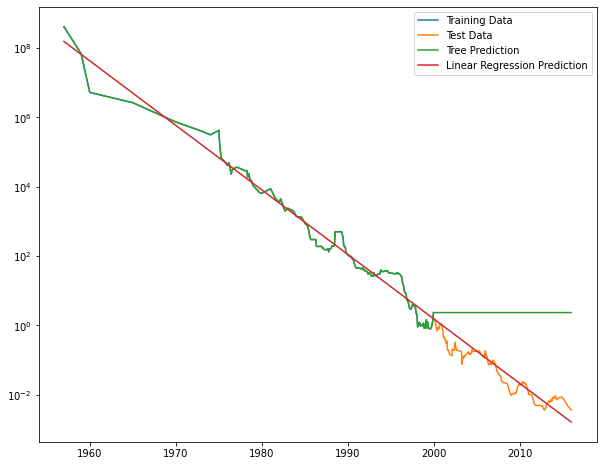

In [30]:
plt.figure(figsize=(10,8))
plt.semilogy(data_train.date, data_train.price, label="Training Data")
plt.semilogy(data_test.date, data_test.price, label="Test Data") 
plt.semilogy(ram_prices.date, price_tree, label="Tree Prediction") #트리예측
plt.semilogy(ram_prices.date, price_lr, label="Linear Regression Prediction") #선형회귀 예측
plt.legend()
plt.show()